# House Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
hs_price_pred = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [4]:
hs_price_pred.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
hs_price_pred.shape

(1460, 81)

## Numerical Attributes

In [7]:
hs_price_pred = hs_price_pred.drop('Id', axis = 1)

In [8]:
hs_price_pred.select_dtypes(exclude = ['object']).describe().round(decimals = 2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


## Categorical Attributes

In [10]:
hs_price_pred.select_dtypes(include = ['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [11]:
hs_price_pred['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

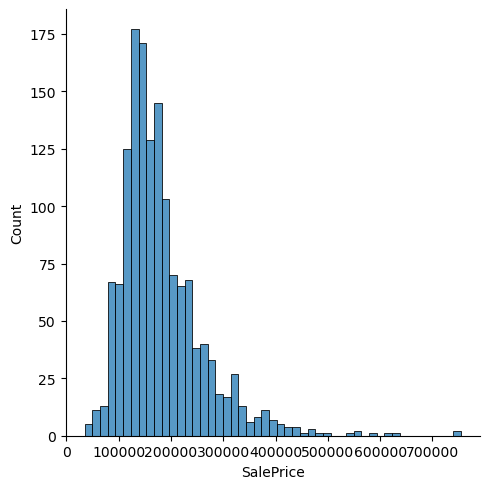

In [12]:
sns.displot(hs_price_pred['SalePrice'])

Text(0.5, 9.444444444444438, 'log(Sale-Price)')

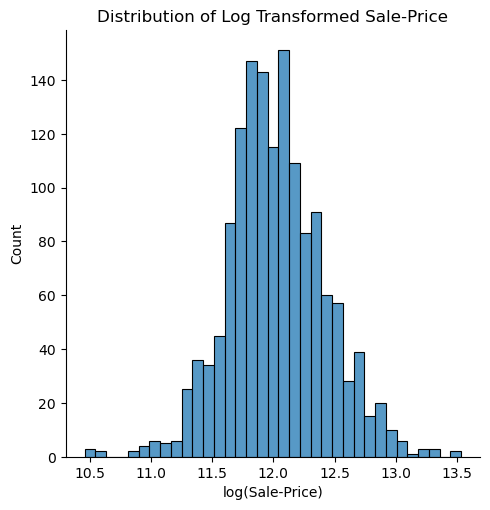

In [13]:
sns.displot(np.log(hs_price_pred['SalePrice']))
plt.title('Distribution of Log Transformed Sale-Price')
plt.xlabel('log(Sale-Price)')

In [14]:
num_attribute = hs_price_pred.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()
print(len(num_attribute.columns))

36


/var/folders/x5/rlzzf_0j3x52jplcfrp4vjtc0000gn/T/ipykernel_1515/3638324724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_attribute.iloc[:,i].dropna(), hist = True, rug = True)
/var/folders/x5/rlzzf_0j3x52jplcfrp4vjtc0000gn/T/ipykernel_1515/3638324724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

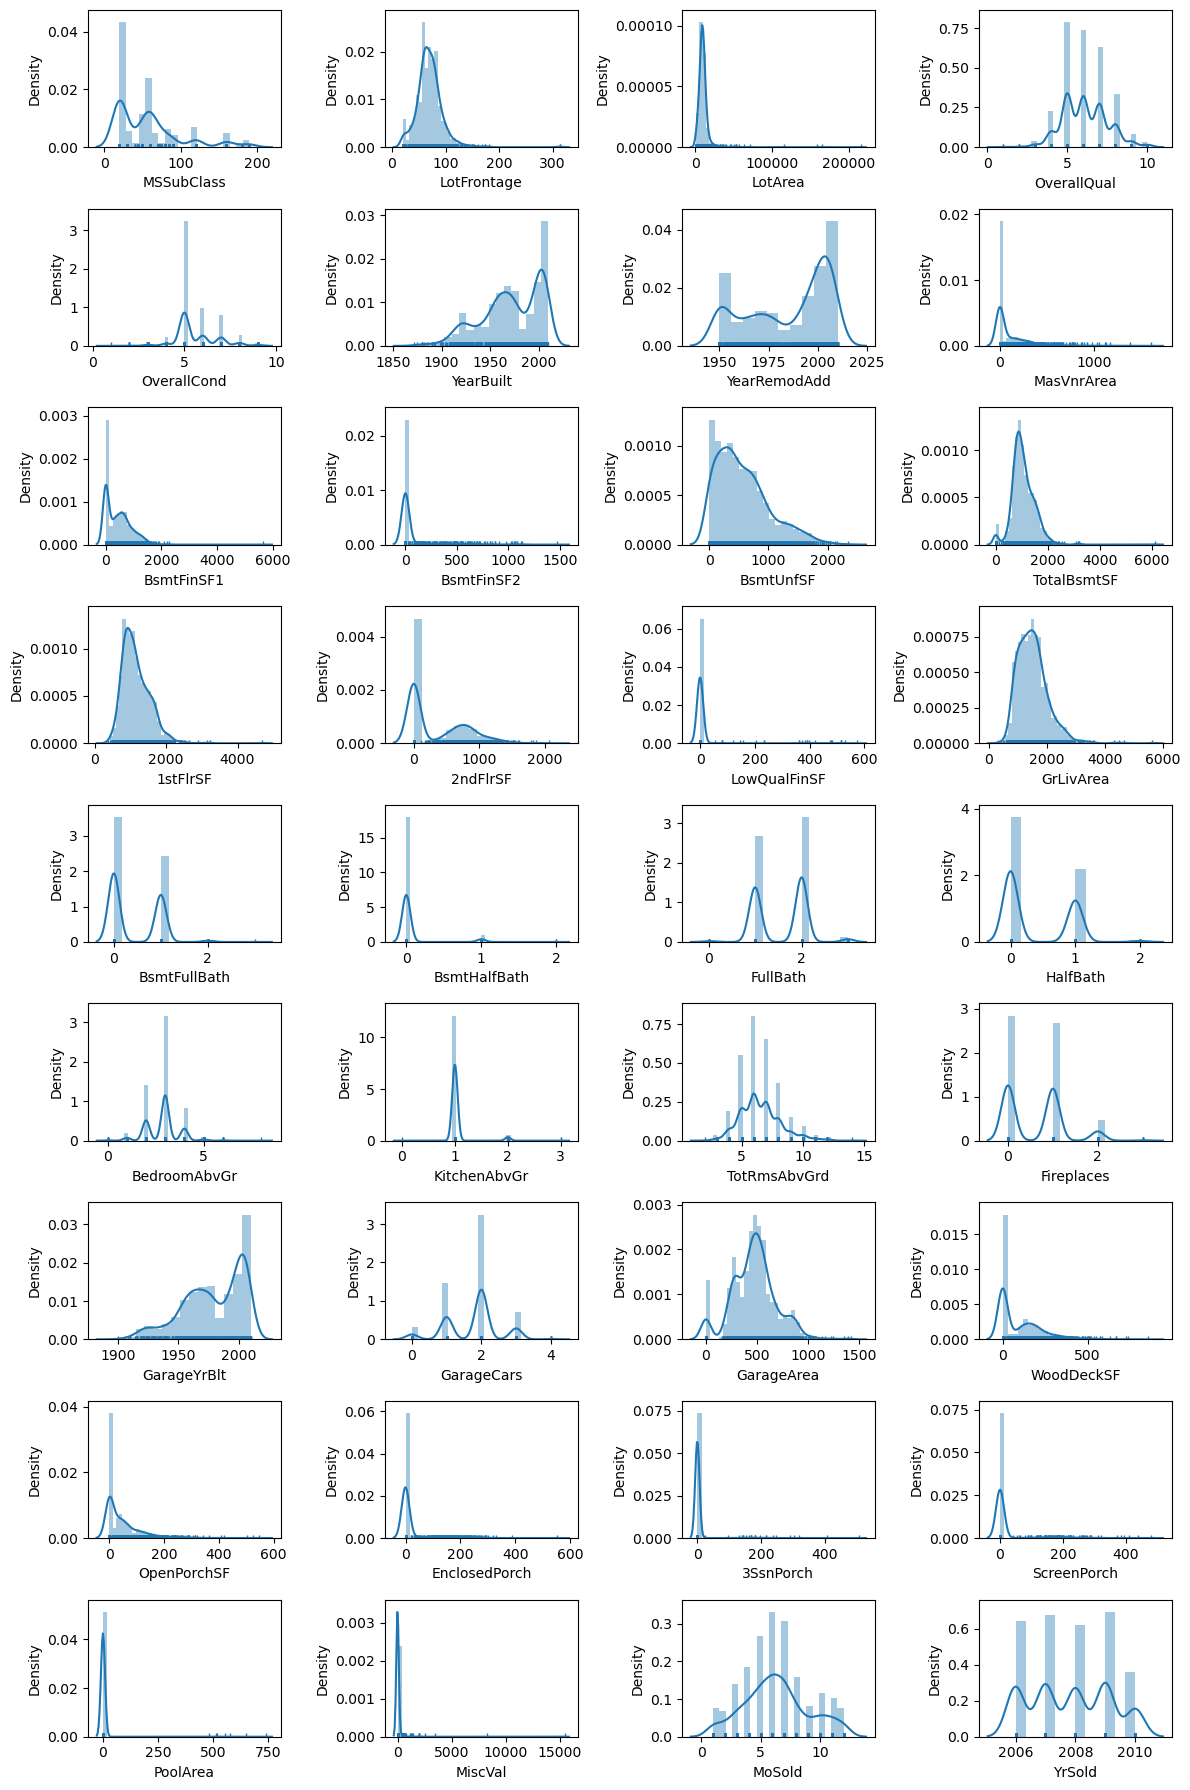

In [15]:
fig = plt.figure(figsize = (12,18))
for i in range(len(num_attribute.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attribute.iloc[:,i].dropna(), hist = True, rug = True)
    plt.xlabel(num_attribute.columns[i])

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize = (10,15))

for i in range(len(num_attribute.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=num_attribute.iloc[:,i])

plt.tight_layout()
plt.show()

## Correlations Among Numerical Attributes

37


<Axes: >

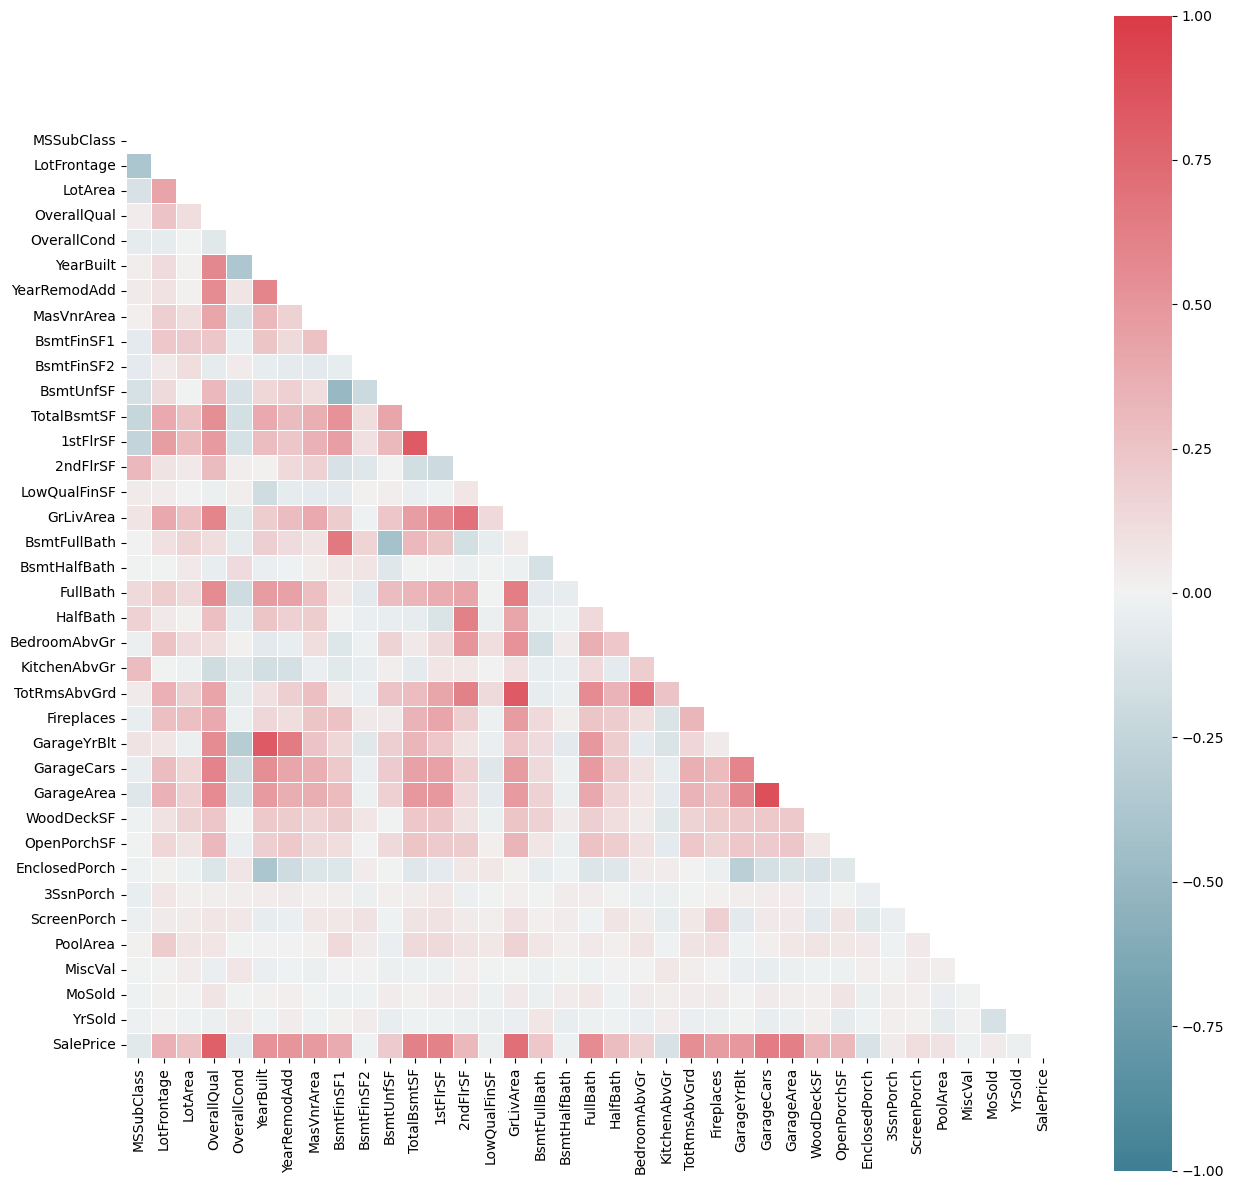

In [20]:
housing = hs_price_pred.select_dtypes(exclude = 'object').copy()
print(len(housing.columns))

# Correlations of numerical attributes
corr = housing.corr()

# Using Mask to get a triangular correlation matrix
f, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

## Creating a correlation of all the numerical values and the targeted value for better understanding

In [22]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### From this we can see that OverallQual and GrLivArea are the highly correlated values while the PoolArea and MoSold are not so correlated.

## Pair-wise Scatter Matrix

### We have lot of unique pairs of variable i.e. N(N-1)/2. Joint Distribution can be used to see the relationships between all the possible pairs. Two at a time.

In [ ]:
col = ['SalePrice','OverallQual','GrLivArea','YearBuilt']
sns.pairplot(housing[col])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

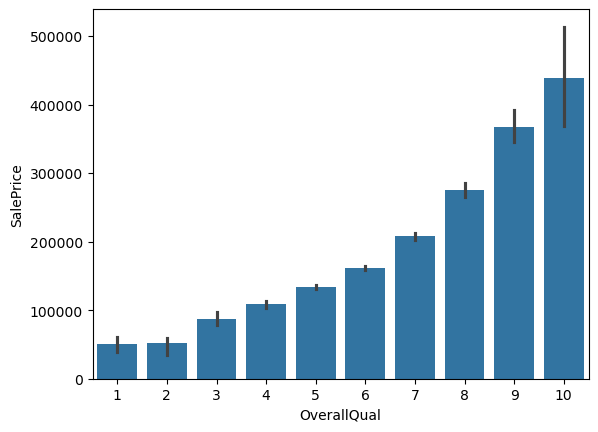

In [27]:
sns.barplot(x = housing.OverallQual, y = housing.SalePrice)


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

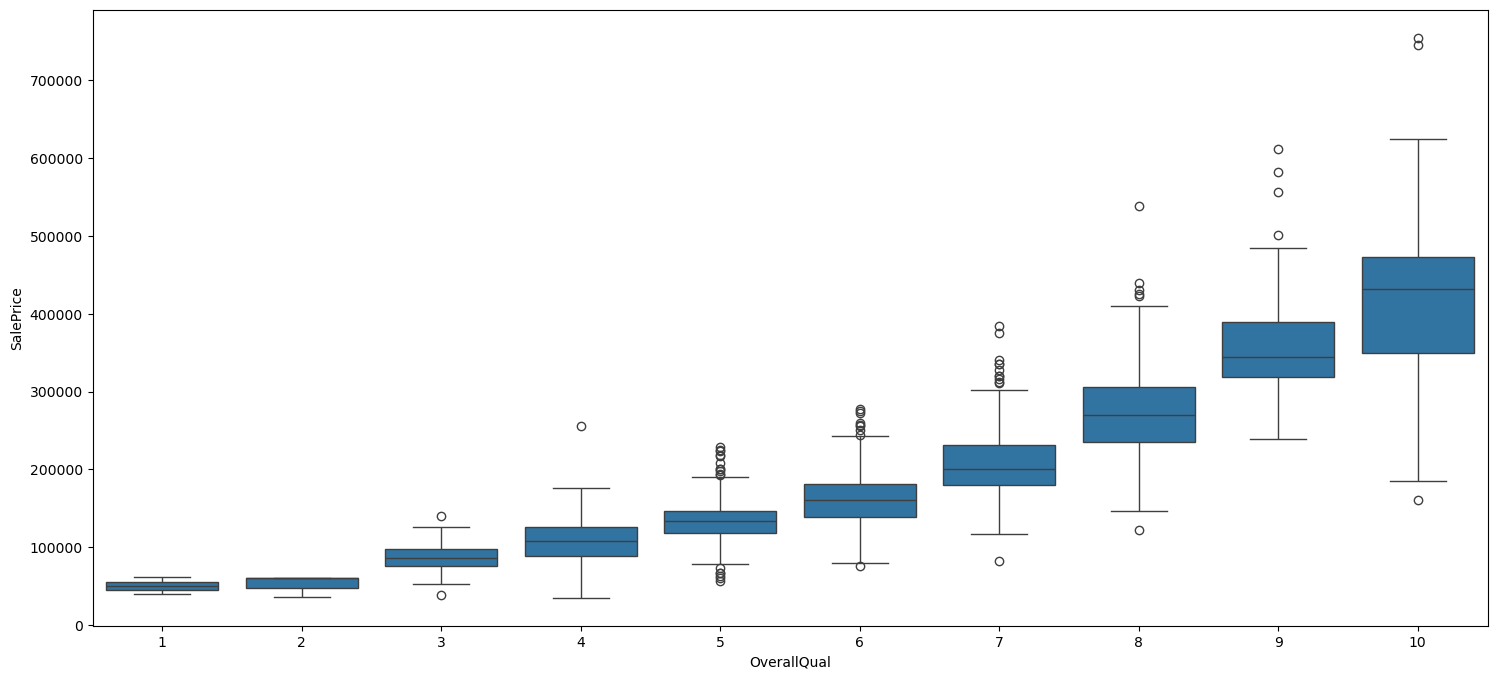

In [28]:
# Box Plot
plt.figure(figsize = (18,8))
sns.boxplot(x = housing.OverallQual, y = housing.SalePrice)

## Looking for correlations among attributes with regard to each other as well, not just with the target variable.

In [31]:
# Only important correlations and not auto-correlation

threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]).unstack().dropna().to_dict()

# print(important_corrs)

unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key])\
                                               for key in important_corrs])),
                                      columns = ['Attribute Pair','correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,correlation
37,"(GarageArea, GarageCars)",0.882475
8,"(GarageYrBlt, YearBuilt)",0.825667
9,"(GrLivArea, TotRmsAbvGrd)",0.825489
1,"(1stFlrSF, TotalBsmtSF)",0.819530
16,"(OverallQual, SalePrice)",0.790982
28,"(GrLivArea, SalePrice)",0.708624
34,"(2ndFlrSF, GrLivArea)",0.687501
19,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
18,"(BsmtFinSF1, BsmtFullBath)",0.649212
12,"(GarageYrBlt, YearRemodAdd)",0.642277


## Exploring Categorical Attributes

In [33]:
cat_columns = hs_price_pred.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Kitchen Quality vs SalePrice

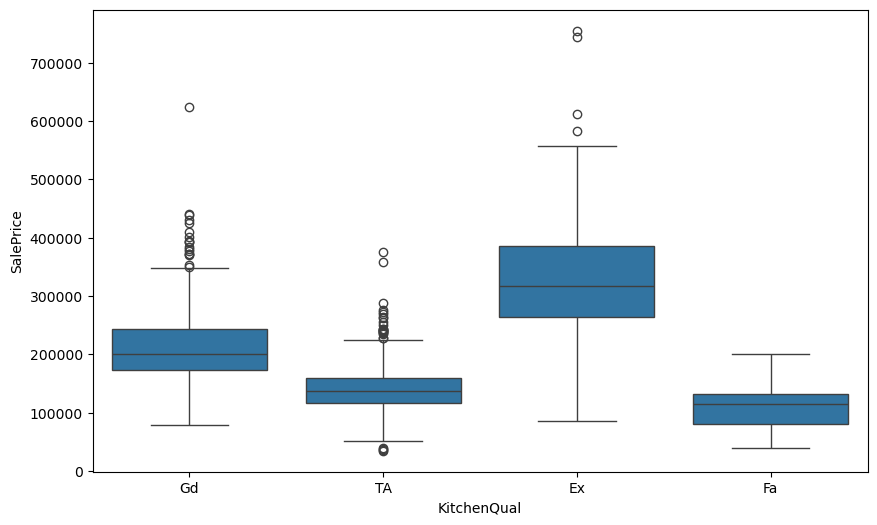

In [35]:
var = hs_price_pred['KitchenQual']
f, ax = plt.subplots(figsize = (10,6))
sns.boxplot(y = hs_price_pred.SalePrice, x = var)
plt.show()

## HouseStyle vs SalePrice

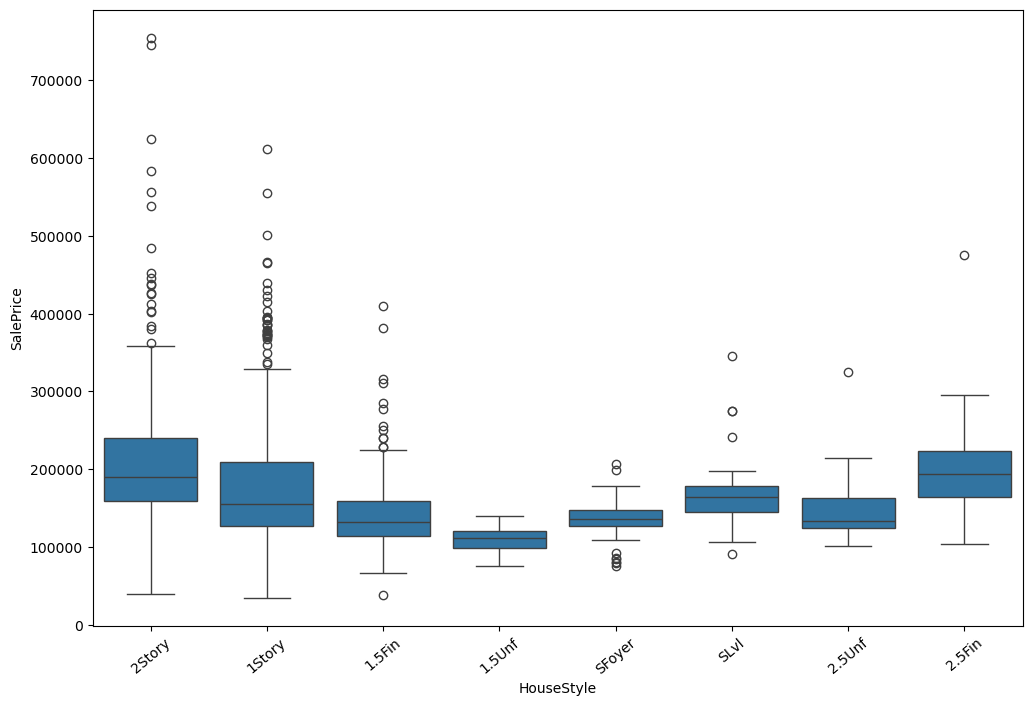

In [37]:
f, ax = plt.subplots(figsize = (12,8))
sns.boxplot(y = hs_price_pred.SalePrice, x = hs_price_pred.HouseStyle)
plt.xticks(rotation  = 40)
plt.show()

## Getting frequency of each of this housestyle type using count plot

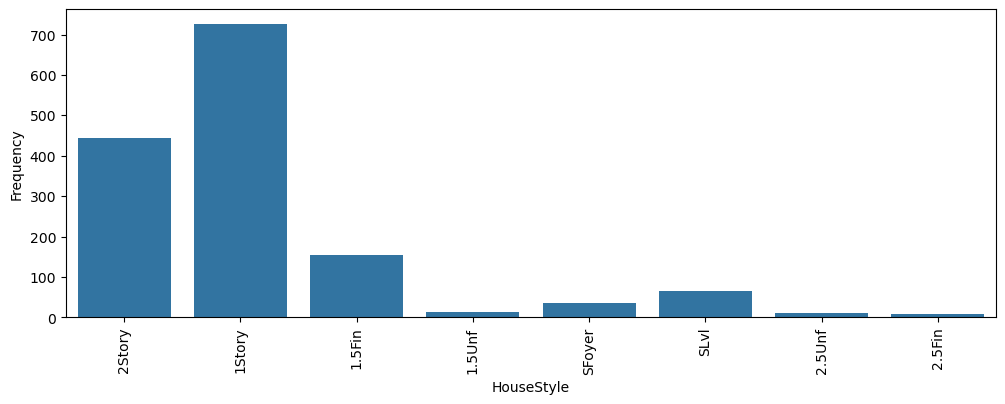

In [39]:
fig = plt.figure(figsize = (12,4))
sns.countplot(x = 'HouseStyle', data = hs_price_pred)
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

In [40]:
hs_price_pred['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

## Year Built vs HouseStyle

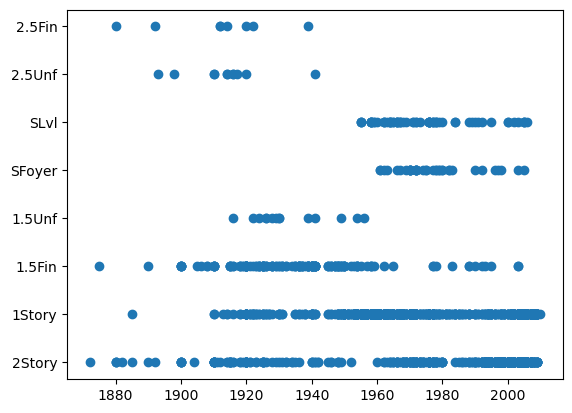

In [42]:
plt.scatter(hs_price_pred['YearBuilt'], hs_price_pred['HouseStyle'])

# Dealing with Missing Values

In [44]:
test = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [45]:
missing_values_att = hs_price_pred.isnull().sum()[hs_price_pred.isnull().sum() > 0].sort_values(ascending = False)
print(missing_values_att, len(missing_values_att))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64 19


In [46]:
# Imputing Missing Values

housing_processed = hs_price_pred

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

# Replacing Missing Values for Categorical Atrributes with NONE
for cat in cat_cols_fill_none:
    housing_processed[cat] = housing_processed[cat].fillna("None")

# Grouping by neighborhood and fill in missing value by the median LotFrontage of all the neighbhorhood
housing_processed['LotFrontage'] = housing_processed.groupby("Neighborhood")['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# Garage: GrageYrBlt, GarageArea, and GarageCars these are numerical columns, replacing missing values with Zero
for col in ['GarageYrBlt','GarageArea','GarageCars']:
    housing_processed[col] = housing_processed[col].fillna(int(0))

# Replacing MasVnrArea(Masonry Veneer Area(Decorative Brick Area outside the house) a numerical attribute, with Zero
housing_processed['MasVnrArea'] = housing_processed['MasVnrArea'].fillna(int(0))


# Currently non seeing any empty values in Electrical
housing_processed['Electrical'] = housing_processed['Electrical'].fillna(housing_processed['Electrical']).mode()[0]

# No need of Utilities, so droping Utilities
housing_processed = housing_processed.drop(['Utilities'], axis = 1)


## Rechecking if any missing values left

In [48]:
housing_processed.isnull().apply(sum).max()

0

## Dealing with Outliers

In [50]:
num_attributes = housing_processed.select_dtypes(exclude = 'object')

# housing_processed.info()

high_quant = housing_processed.select_dtypes(include = 'number').quantile(0.999)

for i in num_attributes.columns:
    housing_processed = housing_processed.drop(housing_processed[i][housing_processed[i] > high_quant[i]].index)

housing_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   Alley          1422 non-null   object 
 6   LotShape       1422 non-null   object 
 7   LandContour    1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemodAdd 

## Dealing with Correlated Attributes

#### Using high correlated features when creating machine learning models can impact performance negatively.

In [53]:
## Removing highly correlated values
# Removing attributes that were identified for excluding when vewing scatter plots and correlation values.
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch']

housing_processed = housing_processed.drop(attributes_drop, axis=1)

In [54]:
# ## Transforming Cat variables
# cat_encoder = OneHotEncoder()
# housing_processed_1hot = cat_encoder.fit_transform(housing_processed)
# housing_processed_1hot

## Transformation Pipeline

### Numerical Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [58]:
# Separate features and target variable
housing_X = housing_processed.drop("SalePrice", axis = 1)
housing_y = housing_processed["SalePrice"].copy()

# Get the list of names for numerical and categorical attributes seprately
num_att = housing_X.select_dtypes(exclude='object')
cat_att = housing_X.select_dtypes(include='object')

num_attribs = list(num_att)
cat_attribs = list(cat_att)

# Numerical Pipeline to impute any missing values with the median and feature scale attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])

## Final Transformer combining Numerical & Categorical Pipeline

In [60]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
])

# Description before applying transforms
print(housing_y.describe())

# Apply log-transform to SalePrice
housing_y_prepared = np.log(housing_y)

# Run the transformation pipeline on all the other attributes
housing_X_prepared = full_pipeline.fit_transform(housing_X)

# Description before applying transforms
print(housing_y_prepared.describe())

housing_X_prepared

count      1422.000000
mean     178405.042897
std       74506.926127
min       35311.000000
25%      129600.000000
50%      161500.000000
75%      211750.000000
max      611657.000000
Name: SalePrice, dtype: float64
count    1422.000000
mean       12.014792
std         0.389594
min        10.471950
25%        11.772207
50%        11.992260
75%        12.263160
max        13.323927
Name: SalePrice, dtype: float64


<1422x281 sparse matrix of type '<class 'numpy.float64'>'
	with 98118 stored elements in Compressed Sparse Row format>

## Train and Evaluate multiple models on the Training Set

### Creating a Test Set

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    housing_X_prepared, housing_y_prepared, test_size = 0.2, random_state = 7)

## Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 89.54568968671576


### As we are dealing with a regression problem, Using RSME(Root Mean Square Error) is a typical performance measure for regression problems.

#### Difference between Predicted Values vs Actual Values. A measure of how spread out the errors are from the line of best-fit.

### 1️⃣ We took the log of our target variable, so we have to convert back to their original values before evaluating RMSE.

In [71]:
def inv_y(y):
    return np.exp(y)

## Training other models

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost

In [74]:
# Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collect RMSE for the different algorithms: "Algorithm name + RMSE"
rmse_compare = pd.Series()
rmse_compare.index.name = 'Model'

# Series to collect accuracy scores for the different algorithms: "Algorithm name + score"
score_compare = pd.Series()
score_compare.index.name = 'Model'

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
score_compare['LinearRegression'] = lr_score

In [75]:
# Model 2: Decision Trees. Defining the Model

dtree_model = DecisionTreeRegressor(random_state = 5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
score_compare['DecisionTree'] = dtree_score

In [76]:
# Model 3: Random Forest. Defining the Model
rf_model = RandomForestRegressor(random_state = 5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
score_compare['RandomForest'] = rf_score

In [77]:
# Model 4: Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.05,
                                      max_depth = 4, random_state = 5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
score_compare['GradientBoosting'] = gbr_score

In [78]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping

In [79]:
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_X_test = xgb.DMatrix(X_test)
# xgb_y_test = xgb.DMatrix(y_test)

## XGBoost GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [108]:
xgb_model_gs = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    eval_metric='rmse',
    early_stopping_rounds=50,
)

xbg_param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model_gs,
    param_grid=xbg_param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train, 
                eval_set=[(X_test, y_test)],
                verbose=False)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.8}


## XGBoost RandomSearchCV

In [92]:
# Define XGBoost model
xgb_model_rs = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    eval_metric='rmse',
    early_stopping_rounds=50
)

# Define a smaller, realistic hyperparameter grid
xgb_param_dist = {
    'n_estimators': [300, 500, 700, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized search with 50 iterations
random_search = RandomizedSearchCV(
    estimator=xgb_model_rs,
    param_distributions=xgb_param_dist,
    n_iter=50,  # Try 50 random combinations
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit
random_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("Best parameters found: ", random_search.best_params_)
print("Best RMSE (negative): ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best RMSE (negative):  -0.11286578970634698


## XGBoost

In [110]:
# Model 5: XGBoost

xgb_model = XGBRegressor(
    # objective='reg:squarederror',
    # max_depth=3,
    # learning_rate=0.1,
    # n_estimators=50,
    objective='reg:squarederror',
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_alpha=0,   # L1 regularization
    reg_lambda=1.5,    # L2 regularization
    random_state=42,
    eval_metric="rmse",
    early_stopping_rounds=50
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
             )

xgb_pred = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(inv_y(xgb_pred), inv_y(y_test))
xgb_rmse = np.sqrt(xgb_rmse)
rmse_compare['XgBoost'] = xgb_rmse

xgb_score = xgb_model.score(X_test, y_test)*100
score_compare['XgBoost'] = xgb_score

In [169]:
print('RMSE values for different algorithms:')
rmse_compare.sort_values(ascending = True).round()

RMSE values for different algorithms:


Model
LinearRegression    24663.0
XgBoost             26210.0
GradientBoosting    27219.0
RandomForest        30255.0
DecisionTree        39156.0
dtype: float64

In [171]:
print('Accuracy scores for different algorithms:')
score_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
XgBoost             90.747
GradientBoosting    89.568
LinearRegression    89.546
RandomForest        86.317
DecisionTree        73.726
dtype: float64

## Evaluating using Cross-Validation

In [173]:
from sklearn.model_selection import cross_val_score

In [175]:
# Perform K fold cross-validation, where K=10
scores = cross_val_score(linear_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

# Display results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviatioin:", scores.std())

display_scores(linear_rmse_scores)

Scores: [0.11259125 0.13870487 0.10560806 0.12879777 0.10938562 0.11523047
 0.10956989 0.11721003 0.133319   0.11522017]
Mean: 0.11856371330957116
Standard deviatioin: 0.010587201569925419


### Submission File

In [177]:
test_hs_price = "house-prices-advanced-regression-techniques/test.csv"
test_hs_data = pd.read_csv(test_hs_price)

In [179]:
ids = test_hs_data.pop('Id')

In [181]:
missing_values_att_pred = test_hs_data.isnull().sum()[test_hs_data.isnull().sum() > 0].sort_values(ascending = False)
print(missing_values_att_pred, len(missing_values_att_pred))

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64 33


In [183]:
# Replacing Missing Values for Categorical Atrributes with NONE
for cat in cat_cols_fill_none:
    test_hs_data[cat] = test_hs_data[cat].fillna("None")

# Grouping by neighborhood and fill in missing value by the median LotFrontage of all the neighbhorhood
test_hs_data['LotFrontage'] = test_hs_data.groupby("Neighborhood")['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# Garage: GrageYrBlt, GarageArea, and GarageCars these are numerical columns, replacing missing values with Zero
#     'BsmtFullBath','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF'
for col in ['GarageYrBlt','GarageArea','GarageCars']:
    test_hs_data[col] = test_hs_data[col].fillna(int(0))

# Replacing MasVnrArea(Masonry Veneer Area(Decorative Brick Area outside the house) a numerical attribute, with Zero
test_hs_data['MasVnrArea'] = test_hs_data['MasVnrArea'].fillna(int(0))


# Currently non seeing any empty values in Electrical
test_hs_data['Electrical'] = test_hs_data['Electrical'].fillna(test_hs_data['Electrical']).mode()[0]

# New categorical columns that are blank in test data
# cat_cols_fill_none_test=['MSZoning','Functional','Exterior1st','Exterior2nd','KitchenQual','SaleType']
# for cat in cat_cols_fill_none_test:
#     test_hs_data[cat] = test_hs_data[cat].fillna("None")

In [185]:
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch','Utilities']

housing_processed_pred = test_hs_data.drop(attributes_drop, axis=1)

In [187]:
missing_values_att_pred2 = housing_processed_pred.isnull().sum()[housing_processed_pred.isnull().sum() > 0].sort_values(ascending = False)
print(missing_values_att_pred2, len(missing_values_att_pred2))

MSZoning        4
BsmtFullBath    2
Functional      2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
SaleType        1
dtype: int64 10


In [189]:
housing_processed_pred.isnull().apply(sum).max()

4

In [195]:
housing_X.shape

(1422, 69)

In [197]:
housing_processed_pred.shape

(1459, 69)

In [199]:
housing_processed_pred

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,...,140,0,0,120,0,None,MnPrv,None,WD,Normal
1,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,...,393,36,0,0,0,None,None,Gar2,WD,Normal
2,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,...,212,34,0,0,0,None,MnPrv,None,WD,Normal
3,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,...,360,36,0,0,0,None,None,None,WD,Normal
4,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,...,0,82,0,144,0,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,0,0,0,None,None,None,WD,Normal
1455,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,...,0,24,0,0,0,None,None,None,WD,Abnorml
1456,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,...,474,0,0,0,0,None,None,None,WD,Abnorml
1457,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,...,80,32,0,0,0,None,MnPrv,Shed,WD,Normal


In [201]:
print(len(housing_processed_pred.columns))

69


In [203]:
print(len(housing_X.columns))

69


In [205]:
for i in housing_processed_pred.columns:
    if i in housing_X:
        continue
    else:
        print(i)

In [207]:
# Run the transformation pipeline on all the other attributes
housing_X_prepared_pred = full_pipeline.transform(housing_processed_pred)

In [209]:
print(housing_X_prepared.shape[1])
print(housing_X_prepared_pred.shape[1])

281
281


In [211]:
preds = xgb_model.predict(housing_X_prepared_pred)

output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461,11.735488
1,1462,11.973716
2,1463,12.158435
3,1464,12.167114
4,1465,12.103401
